In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#observation data:

#read the interpolated data:
ERAdata = xr.open_dataset('C://Users//frida//OneDrive//Dokument//Klimatdatatillampningar//Growing_degree_days//tmean_example.nc')
#f = data.t2m.interp(latitude=57.5, longitude=11.5)
#ERAdegreeC = f.loc['1948-01-01':'2014-12-31']-273.15
#degreeC = degreeC.drop_vars(['latitude', 'longitude'])
#xr.Dataset({'t2m': degreeC}).to_netcdf('tmean_example.nc')
ERAdata

<xarray.Dataset>
Dimensions:  (time: 27010)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-01-02 ... 2021-12-31
Data variables:
    tm       (time) float64 ...

In [5]:
#simulation data:

KACEdataHist = xr.open_dataset('C://Users//frida//OneDrive//Dokument//Klimatdatatillampningar//Growing_degree_days//tas_day_KACE-1-0-G_historical_r1i1p1f1_gr_18500101-20141230.nc')
g = KACEdataHist.tas.interp(lon = 11.5, lat=57.5)
KACEdegreeC = g.loc['1948-01-01':'2014-12-30']-273.15
KACEdegreeC

<xarray.DataArray 'tas' (time: 24120)>
array([-18.07918294,  -3.85898844, -10.1796875 , ...,   5.74110921,
         4.48011882,   2.86502279])
Coordinates:
  * time     (time) object 1948-01-01 12:00:00 ... 2014-12-30 12:00:00
    height   float64 2.0
    lon      float64 11.5
    lat      float64 57.5

In [6]:
#Flowering days with ERA data

tm = ERAdata.tm
time = tm.time

#Calculate DD5
DD5 = tm-5
DD5 = DD5.where(DD5 >= 5, 0) #make DD5 to 0 when DD5 less than 5

#DD5 in 2021
DD5_2021 = DD5.loc[DD5.time.dt.year==2021]
Cumulative_DD5_2021 = np.cumsum(DD5_2021)

#Flowering start date in 2021
Flowering_start_2021 = DD5_2021.time[np.where(Cumulative_DD5_2021 >= 200)[0][0]].values #the flowering start date is defined as when the cumulative growing degree days are 200?

#Flowering end date in 2021
Flowering_end_2021 = DD5_2021.time[np.where(Cumulative_DD5_2021 >= 240)[0][0]].values

#Flowering duration in 2021
duration = (Flowering_end_2021 - Flowering_start_2021).astype('timedelta64[D]')

Text(0, 0.5, 'DD5 (°C)')

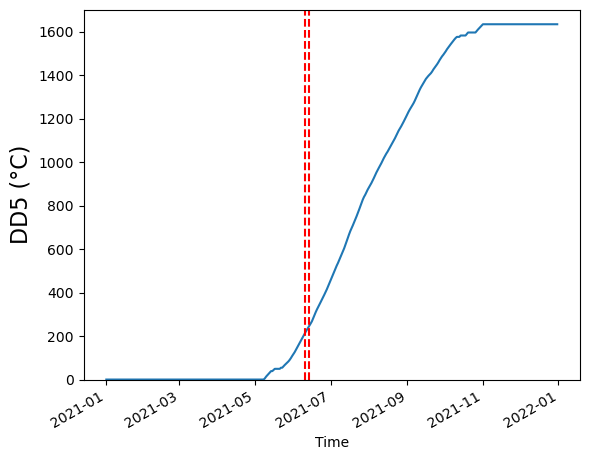

In [7]:
#plot with the ERA data
Cumulative_DD5_2021.plot()
plt.axvline(x=Flowering_start_2021, color='red', linestyle='--')  #sxvline for vertical line in plot across the axes
plt.axvline(x=Flowering_end_2021, color='red', linestyle='--')
plt.ylim(0,1700)
plt.ylabel('DD5 (°C)',fontsize=16)
#what does the y axis represent? frequency? But it's just 2021, right?

In [8]:
#Calculate the start, end and length of the flowering for every year in the historical record (still ERA I think)

#Calculate DD5
DD5 = tm-5
DD5 = DD5.where(DD5 >= 5, 0) #make DD5 to 0 when DD5 less than 5

Flowering_start_yearly = []
Flowering_end_yearly = []
duration = []

for year in range(1948,2014,1):
    DD5_yearly = DD5.loc[DD5.time.dt.year==year]
    Cumulative_DD5_yearly = np.cumsum(DD5_yearly)
    Flowering_start_yearly.append(DD5_yearly.time[np.where(Cumulative_DD5_yearly >= 200)[0][0]].values)
    Flowering_end_yearly.append(DD5_yearly.time[np.where(Cumulative_DD5_yearly >= 240)[0][0]].values)
    duration.append((Flowering_end_yearly[year-1948] - Flowering_start_yearly[year-1948]).astype('timedelta64[D]'))

In [9]:
#bias correction

#monthly averages
tmMonthly = ERAdata.groupby(ERAdata.time.dt.month).mean()
tmSimMonthly = KACEdegreeC.groupby(KACEdegreeC.time.dt.month).mean()

tmMonthly


<xarray.Dataset>
Dimensions:  (month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tm       (month) float64 0.3237 -0.01257 1.716 5.426 ... 9.048 4.846 1.999

Text(0.5, 1.0, '')

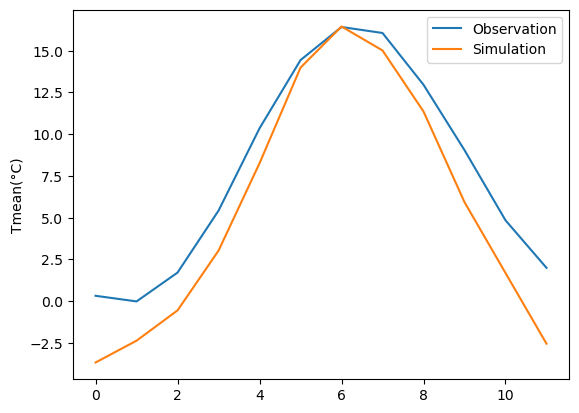

In [10]:
plt.plot(tmMonthly.tm, label='Observation')
plt.plot(tmSimMonthly, label='Simulation')
plt.ylabel('Tmean(°C)')
plt.legend()
plt.title('')

In [11]:
DD5_sim = KACEdegreeC-5
DD5_sim = DD5_sim.where(DD5_sim >= 5, 0)

In [12]:
Flowering_start_yearly = []
Flowering_end_yearly = []
duration = []

Flowering_start_yearly_sim = []
Flowering_end_yearly_sim = []
duration_sim = []

for year in range(1948,2014,1):
    DD5_yearly = DD5.loc[DD5.time.dt.year==year]
    Cumulative_DD5_yearly = np.cumsum(DD5_yearly)
    Flowering_start_yearly.append(DD5_yearly.time[np.where(Cumulative_DD5_yearly >= 200)[0][0]].values)
    Flowering_end_yearly.append(DD5_yearly.time[np.where(Cumulative_DD5_yearly >= 240)[0][0]].values)
    duration.append((Flowering_end_yearly[year-1948] - Flowering_start_yearly[year-1948]).astype('timedelta64[D]'))    

    DD5_yearly_sim = DD5_sim.loc[DD5_sim.time.dt.year==year]
    Cumulative_DD5_yearly_sim = np.cumsum(DD5_yearly_sim)
    Flowering_start_yearly_sim.append(DD5_yearly_sim.time[np.where(Cumulative_DD5_yearly_sim >= 200)[0][0]].values)
    Flowering_end_yearly_sim.append(DD5_yearly_sim.time[np.where(Cumulative_DD5_yearly_sim >= 240)[0][0]].values)
    duration_sim.append((Flowering_end_yearly_sim[year-1948] - Flowering_start_yearly_sim[year-1948]))

In [13]:
#here should be something with days

In [14]:
duration = np.array(duration).astype('timedelta64[D]').astype(int)
duration_sim = np.array(duration_sim).astype('timedelta64[D]').astype(int)

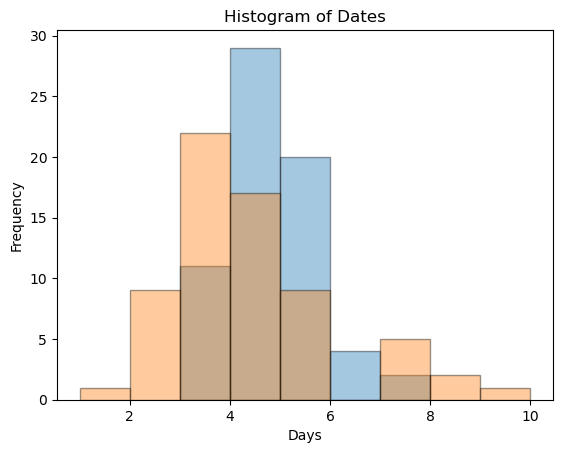

In [15]:
plt.hist(duration, bins=duration.max() - duration.min(), alpha=0.4,edgecolor='k')  
plt.hist(duration_sim, bins=duration_sim.max() - duration_sim.min(), alpha=0.4,edgecolor='k')  

plt.xlabel('Days')  
plt.ylabel('Frequency')  
plt.title('Histogram of Flowering duration')  
# plt.xticks([121,152,182],['May','June','July'])

plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Histogram of Dates')
plt.show()
plt.show()

Text(0.5, 1.0, '')

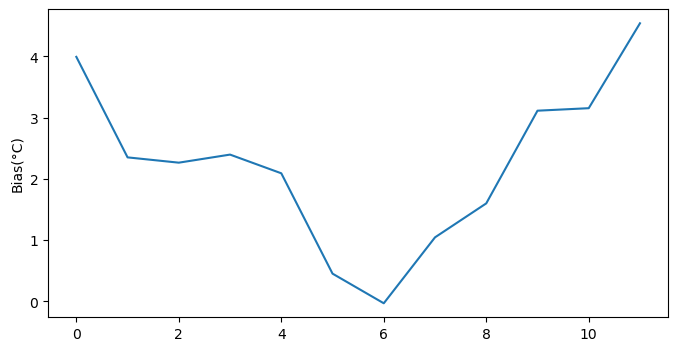

In [16]:
bias = tmMonthly.tm-tmSimMonthly

plt.figure(figsize=(8, 4))
plt.plot(bias)
plt.ylabel('Bias(°C)')
plt.title('')

In [27]:
#remove bias

tm_sim_grouped = KACEdegreeC.groupby(KACEdegreeC.time.dt.month)

for i, month in enumerate(range(1, 13)):
    tm_sim_without_bias = tm_sim_grouped.apply(lambda x: x - bias[i-1])
    
DD5_sim_without_bias = tm_sim_without_bias-5
DD5_sim_without_bias = DD5_sim_without_bias.where(DD5_sim_without_bias >= 5, 0) 

In [18]:
Flowering_start_yearly_sim_wb = []
Flowering_end_yearly_sim_wb = []
duration_sim_wb = []

for year in range(1948,2014,1):
    DD5_yearly_sim_wb = DD5_sim_without_bias.loc[DD5_sim_without_bias.time.dt.year==year]
    Cumulative_DD5_yearly_sim_wb = np.cumsum(DD5_yearly_sim_wb)
    Flowering_start_yearly_sim_wb.append(DD5_yearly_sim_wb.time[np.where(Cumulative_DD5_yearly_sim_wb >= 200)[0][0]].values)
    Flowering_end_yearly_sim_wb.append(DD5_yearly_sim_wb.time[np.where(Cumulative_DD5_yearly_sim_wb >= 240)[0][0]].values)
    duration_sim_wb.append((Flowering_end_yearly_sim_wb[year-1948] - Flowering_start_yearly_sim_wb[year-1948]))

#days_sim_wb = []
#for date in Flowering_start_yearly_sim_wb:
    #current_year = np.datetime64(str(date.astype('datetime64[Y]')))
    #days_sim_wb.append((date - current_year).astype('timedelta64[D]').astype(int)  + 1)
#days_sim_wb = np.array(days_sim_wb)

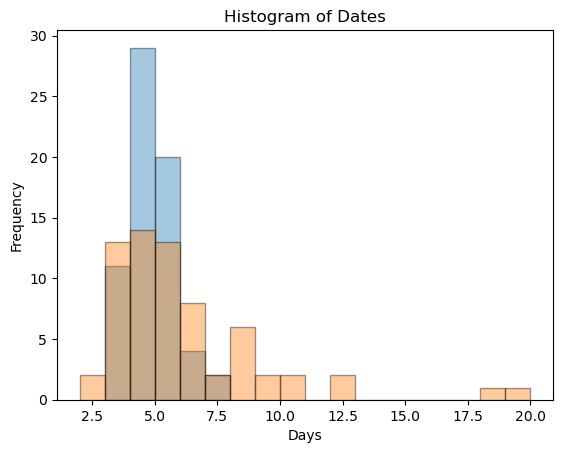

In [19]:
duration_sim_wb = np.array(duration_sim_wb).astype('timedelta64[D]').astype(int)

plt.hist(duration, bins=duration.max() - duration.min(), alpha=0.4,edgecolor='k')  
plt.hist(duration_sim_wb, bins=duration_sim_wb.max() - duration_sim_wb.min(), alpha=0.4,edgecolor='k')  

plt.xlabel('Days')  
plt.ylabel('Frequency')  
plt.title('Histogram of Flowering duration')  
# plt.xticks([121,152,182],['May','June','July'])

plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Histogram of Dates')
plt.show()
plt.show()

In [20]:
#TASK:
#Now select debias the RCP85 scenario data (using the biases you calculated for the historical). 
#Select out a 30 year period for the future, and run the CalculateFlowering function. 
#Make histograms comparing the start of flowering, and flowering length, for the Historical RCM and RCP85 scenarios. 
#Note! even if you have debiased your climate data, you should still always estimate the effects of climate change by comparing historical model runs and future (RCP) runs.

In [21]:
#future data

KACEdataSsp = xr.open_dataset('C://Users//frida//OneDrive//Dokument//Klimatdatatillampningar//Growing_degree_days//KACE_ssp585.nc')
g2 = KACEdataSsp.tas.interp(lon = 11.5, lat=57.5)
KACEdegreeCssp = g2.loc['2015-01-01':'2100-12-30']-273.15
KACEdegreeCssp

<xarray.DataArray 'tas' (time: 30960)>
array([2.57550863, 1.83261312, 1.13323161, ..., 5.30111491, 8.66447347,
       9.48737386])
Coordinates:
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-30 12:00:00
    height   float64 2.0
    lon      float64 11.5
    lat      float64 57.5

In [28]:
#remove bias from ssp data

tas_ssp_grouped = KACEdegreeCssp.groupby(KACEdegreeCssp.time.dt.month)

for i, month in enumerate(range(1, 13)):
    tas_ssp_without_bias = tas_ssp_grouped.apply(lambda x: x - bias[i-1])
    
DD5_ssp_without_bias = tas_ssp_without_bias-5
DD5_ssp_without_bias = DD5_ssp_without_bias.where(DD5_ssp_without_bias >= 5, 0) 

In [29]:
#calculate flowering function for ssp data without bias

Flowering_start_yearly_ssp_wb = []
Flowering_end_yearly_ssp_wb = []
duration_ssp_wb = []

for year in range(2030,2060,1):
    DD5_yearly_ssp_wb = DD5_ssp_without_bias.loc[DD5_ssp_without_bias.time.dt.year==year]      #assigns the values for the loop's current year to the variable "DD5_yearly_ssp"
    Cumulative_DD5_yearly_ssp_wb = np.cumsum(DD5_yearly_ssp_wb)                                #cumulative sum of DD5_yearly_ssp?
    Flowering_start_yearly_ssp_wb.append(DD5_yearly_ssp_wb.time[np.where(Cumulative_DD5_yearly_ssp_wb >= 200)[0][0]].values)
    Flowering_end_yearly_ssp_wb.append(DD5_yearly_ssp_wb.time[np.where(Cumulative_DD5_yearly_ssp_wb >= 240)[0][0]].values)
    duration_ssp_wb.append((Flowering_end_yearly_ssp_wb[year-2030] - Flowering_start_yearly_ssp_wb[year-2030]))

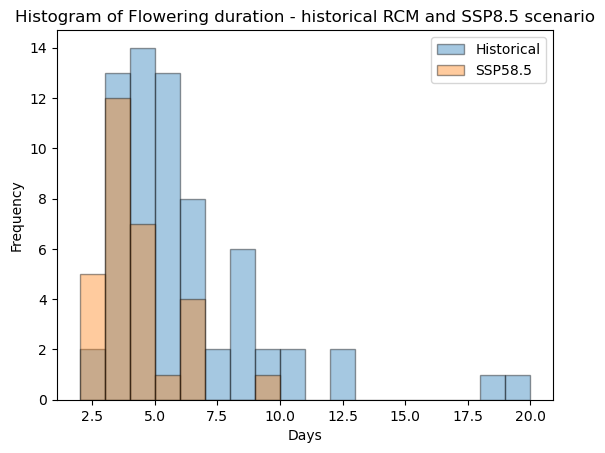

In [44]:
duration_ssp_wb = np.array(duration_ssp_wb).astype('timedelta64[D]').astype(int)

plt.hist(duration_sim_wb, bins=duration_sim_wb.max() - duration_sim_wb.min(), alpha=0.4,edgecolor='k')  
plt.hist(duration_ssp_wb, bins=duration_ssp_wb.max() - duration_ssp_wb.min(), alpha=0.4,edgecolor='k')  

plt.xlabel('Days')  
plt.ylabel('Frequency')  
plt.title('Histogram of Flowering duration - historical RCM and SSP8.5 scenario')
label = 'Historical', 'SSP58.5'
plt.legend(label)

Text(0.5, 0, 'Year')

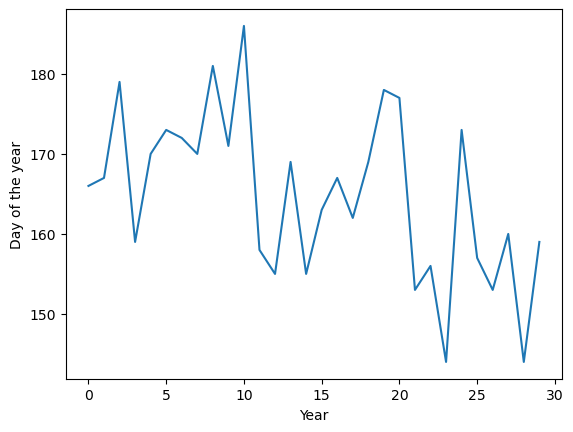

In [71]:
# Extract the day of the year for each date in the list
day_of_year_list = [date.item().dayofyr for date in Flowering_start_yearly_ssp_wb]
plt.plot(day_of_year_list)
plt.ylabel('Day of the year')
plt.xlabel('Year')
#gonna try to label the x axis with the actual years(2030-2060)

In [78]:
#threshold

#what percentile is dd_threshold in the observed data?
dd_threshold = 5
dd_prc = np.mean(dd_threshold >= ERAdata['tm']) * 100
dd_prc_xr = xr.DataArray(dd_prc, dims=(), name='dd_prc')
dd_prc

<xarray.DataArray 'tm' ()>
array(38.58941133)

In [79]:
#what daily temperature is dd_prc in the historical dataset?
dd_threshold_sim = np.percentile(KACEdegreeC,dd_prc)
dd_threshold_sim

3.0204169382855426

In [82]:
DD5_sim_threshold = KACEdegreeC-5
DD5_sim_threshold = DD5_sim_threshold.where(DD5_sim_threshold >= dd_threshold_sim, 0) 

Flowering_start_yearly_sim_threshold = []
Flowering_end_yearly_sim_threshold = []
duration_sim_threshold = []

for year in range(1948,2014,1):
    DD5_yearly_sim_threshold = DD5_sim_threshold.loc[DD5_sim_threshold.time.dt.year==year]
    Cumulative_DD5_yearly_sim_threshold = np.cumsum(DD5_yearly_sim_threshold)
    Flowering_start_yearly_sim_threshold.append(DD5_yearly_sim_threshold.time[np.where(Cumulative_DD5_yearly_sim_threshold >= 200)[0][0]].values)
    Flowering_end_yearly_sim_threshold.append(DD5_yearly_sim_threshold.time[np.where(Cumulative_DD5_yearly_sim_threshold >= 240)[0][0]].values)
    duration_sim_threshold.append((Flowering_end_yearly_sim_threshold[year-1948] - Flowering_start_yearly_sim_threshold[year-1948]))

#days_sim_threshold = []
#for date in Flowering_start_yearly_sim_threshold:
    #current_year = np.datetime64(str(date.astype('datetime64[Y]')))
    #days_sim_threshold.append((date - current_year).astype('timedelta64[D]').astype(int)  + 1)
#days_sim_threshold = np.array(days_sim_threshold)

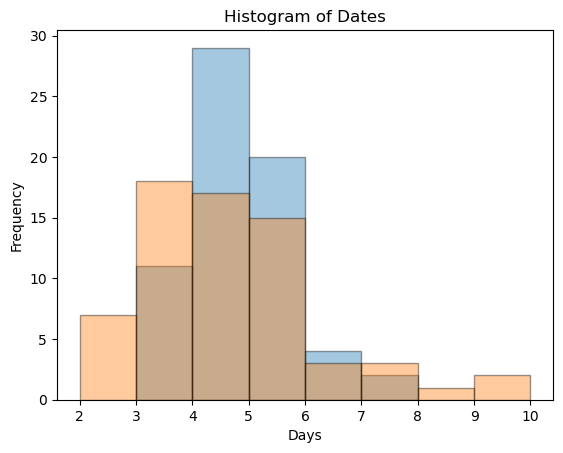

In [83]:
duration_sim_threshold = np.array(duration_sim_threshold).astype('timedelta64[D]').astype(int)

plt.hist(duration, bins=duration.max() - duration.min(), alpha=0.4,edgecolor='k')  
plt.hist(duration_sim_threshold, bins=duration_sim_threshold.max() - duration_sim_threshold.min(), alpha=0.4,edgecolor='k')  

plt.xlabel('Days')  
plt.ylabel('Frequency')  
plt.title('Histogram of Flowering duration')  

plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Histogram of Dates')
plt.show()
plt.show()

In [85]:
#adjusting thresholds

#average floweing season for the observation
avg_length_observations = np.nanmean(duration)
avg_length_observations

4.363636363636363

In [87]:
import warnings
warnings.filterwarnings("ignore")

dd_start = 200
for dd_end in range(230, 250):
    duration_sim_threshold = []
    Flowering_start_yearly_sim_threshold = []
    Flowering_end_yearly_sim_threshold = []
    for year in range(1948,2014,1):
        DD5_yearly_sim_threshold = DD5_sim_threshold.loc[DD5_sim_threshold.time.dt.year==year]
        Cumulative_DD5_yearly_sim_threshold = np.cumsum(DD5_yearly_sim_threshold)
        Flowering_start_yearly_sim_threshold.append(DD5_yearly_sim_threshold.time[np.where(Cumulative_DD5_yearly_sim_threshold >= dd_start)[0][0]].values)
        Flowering_end_yearly_sim_threshold.append(DD5_yearly_sim_threshold.time[np.where(Cumulative_DD5_yearly_sim_threshold >= dd_end)[0][0]].values)
        duration_sim_threshold.append((Flowering_end_yearly_sim_threshold[year-1948] - Flowering_start_yearly_sim_threshold[year-1948]))
    duration_sim_threshold = np.array(duration_sim_threshold).astype('timedelta64[D]').astype(int)
    mean_length = np.nanmean(duration_sim_threshold)
    print(f"dd_end={dd_end}, length={mean_length}")

dd_end=230, length=3.015151515151515
dd_end=231, length=3.1515151515151514
dd_end=232, length=3.257575757575758
dd_end=233, length=3.393939393939394
dd_end=234, length=3.484848484848485
dd_end=235, length=3.5757575757575757
dd_end=236, length=3.6666666666666665
dd_end=237, length=3.8333333333333335
dd_end=238, length=3.909090909090909
dd_end=239, length=4.0
dd_end=240, length=4.196969696969697
dd_end=241, length=4.287878787878788
dd_end=242, length=4.363636363636363
dd_end=243, length=4.454545454545454
dd_end=244, length=4.621212121212121
dd_end=245, length=4.7272727272727275
dd_end=246, length=4.818181818181818
dd_end=247, length=4.9393939393939394
dd_end=248, length=4.984848484848484
dd_end=249, length=5.03030303030303


In [88]:
#using dd_end_model = 236.5(?)
Flowering_start_yearly_sim_threshold = []
Flowering_end_yearly_sim_threshold = []
duration_sim_threshold = []

for year in range(1948,2014,1):
    DD5_yearly_sim_threshold = DD5_sim_threshold.loc[DD5_sim_threshold.time.dt.year==year]
    Cumulative_DD5_yearly_sim_threshold = np.cumsum(DD5_yearly_sim_threshold)
    Flowering_start_yearly_sim_threshold.append(DD5_yearly_sim_threshold.time[np.where(Cumulative_DD5_yearly_sim_threshold >= 200)[0][0]].values)
    Flowering_end_yearly_sim_threshold.append(DD5_yearly_sim_threshold.time[np.where(Cumulative_DD5_yearly_sim_threshold >= 236.5)[0][0]].values)
    duration_sim_threshold.append((Flowering_end_yearly_sim_threshold[year-1948] - Flowering_start_yearly_sim_threshold[year-1948]))

#days_sim_threshold = []
#for date in Flowering_start_yearly_sim_threshold:
    #current_year = np.datetime64(str(date.astype('datetime64[Y]')))
    #days_sim_threshold.append((date - current_year).astype('timedelta64[D]').astype(int)  + 1)
#days_sim_threshold = np.array(days_sim_threshold)

Text(0.5, 1.0, 'Histogram of Flowering duration')

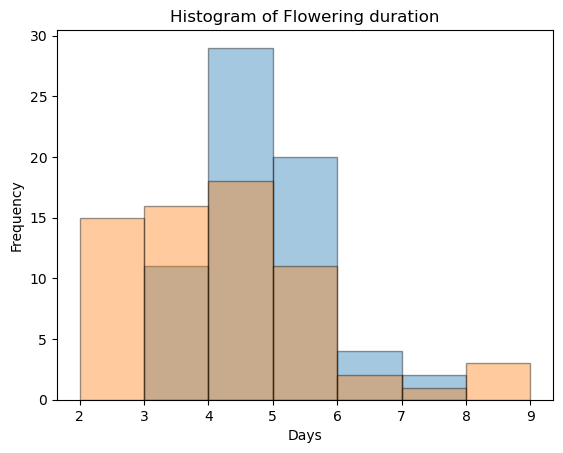

In [89]:
duration_sim_threshold = np.array(duration_sim_threshold).astype('timedelta64[D]').astype(int)

plt.hist(duration, bins=duration.max() - duration.min(), alpha=0.4,edgecolor='k')  
plt.hist(duration_sim_threshold, bins=duration_sim_threshold.max() - duration_sim_threshold.min(), alpha=0.4,edgecolor='k')  

plt.xlabel('Days')  
plt.ylabel('Frequency')  
plt.title('Histogram of Flowering duration')  


In [ ]:
#task:
#This is much easier - you just run the CalculateFlowering using the adjusted thresholds for the scenario, without debiasing it! 
#How did the results compare with the Bias subtraction method??